In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers=2, random_state=6)

clf = svm.SVC(kernel='linear', C = 1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c = y, s = 30, cmap=plt.cm.Paired)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
z = clf.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, z, colors = 'k', levels = [-1, 0, 1], alpha = 0.5,
           linestyles = ['--', '-', '--'])
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s = 100, 
           linewidth = 1, facecolors = 'none')
plt.show()

<Figure size 640x480 with 1 Axes>

D:\RJAZ\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


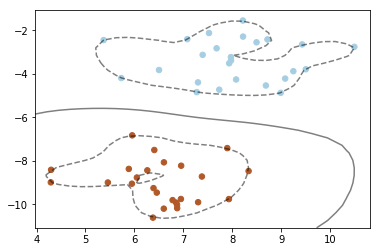

In [7]:
clf_rbf = svm.SVC(kernel='rbf', C = 1000)
clf_rbf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c = y, s = 30, cmap=plt.cm.Paired)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
z = clf_rbf.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, z, colors = 'k', levels = [-1, 0, 1], alpha = 0.5,
           linestyles = ['--', '-', '--'])
ax.scatter(clf_rbf.support_vectors_[:, 0], clf_rbf.support_vectors_[:, 1], s = 100,
           linewidth = 1, facecolors = 'none')
plt.show()


In [8]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

D:\RJAZ\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\RJAZ\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


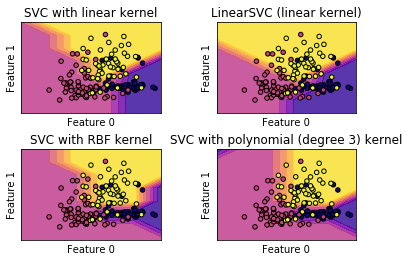

In [9]:
def make_meshgrid(x, y, h = .02):
    x_min, x_max = x.min() -1, x.max() + 1
    y_min, y_max = y.min() -1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max),
                         np.arange(y_min, y_max))
    
    return xx, yy


def plot_coutours(ax, clf, xx, yy, **params):
    z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    out = ax.contourf(xx, yy, z, **params)
    return out

X = df.iloc[:, [1, 2]].values
y = df.iloc[:, [0]].values.flatten()

C = 1.0
models = (svm.SVC(kernel='linear', C = C),
          svm.LinearSVC(C = C),
          svm.SVC(kernel='rbf',gamma = 0.7, C = C),
          svm.SVC(kernel='poly', degree = 3, C = C))
models = (clf.fit(X, y) for clf in models)

titles = ('SVC with linear kernel',
         'LinearSVC (linear kernel)',
         'SVC with RBF kernel',
         'SVC with polynomial (degree 3) kernel')

fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

ax = plt.gca()

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_coutours(ax, clf, xx, yy, cmap = plt.cm.plasma, alpha = 0.8)
    ax.scatter(X0, X1, c= y, cmap = plt.cm.plasma, s = 20, edgecolors = 'k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    
plt.show()

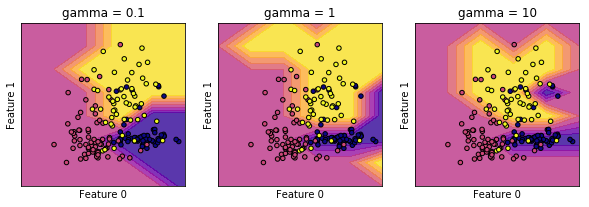

In [15]:
C = 1.0
models = (svm.SVC(kernel='rbf',gamma = 0.1, C = C),
          svm.SVC(kernel='rbf',gamma = 1, C = C),
          svm.SVC(kernel='rbf',gamma = 10, C = C))
models = (clf.fit(X, y) for clf in models)

titles = ('gamma = 0.1',
          'gamma = 1',
          'gamma = 10')
fig, sub = plt.subplots(1, 3, figsize = (10, 3))

X0, X1 = X[:, 0], X[:, 1]
for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_coutours(ax, clf, xx, yy, cmap = plt.cm.plasma, alpha = 0.8)
    ax.scatter(X0, X1, c= y, cmap = plt.cm.plasma, s = 20, edgecolors = 'k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()
